# Linear Gaussian State Space Model

As a first approach to the problem of choosing a proposal for Sequential Monte Carlo (SMC), let's consider a simple linear gaussian state space model. This way, it will be possible to compare obtained results to those provided by a Kalman filter.

We will consider the following model: 
$$
\begin{array}{l}
X_{t+1} = A X_t + W_t\\
Y_{t+1} = B X_t + V_t
\end{array}
$$
where $\ W_t \sim \mathcal{N}(0,Q) \ \textrm{and} \ V_t \sim \mathcal{N}(0, R)$. Our interest is to estimate the latent variables $X_{1:T}$.

First, we will consider a one-dimensional generated dataset.

In [85]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [90]:
# Reading data
with open("./data/gaussian_ssm_data1.txt", "r") as f:
    lines = f.readlines()
    Y = [float(i) for i in lines[1].split(',')[1:]]

In [93]:
Y[:10]

[-0.16656099351081632,
 -0.5247322058408955,
 -0.695351832536738,
 -2.1302440880617004,
 -2.046736385605841,
 -1.6577054922978287,
 0.46916295751903436,
 -0.8290714760236327,
 0.30869551821579194,
 1.2101529982940222]

## Kalman Filter

The first approach to be consider is the Kalman filter, which is implemented by the code bellow, following the procedure described by \[1\].

In [94]:
def KalmanFilter(Y, A, B, Q, R, x0, P0):
    '''
    Implements the Kalman Filter.
    ---
    >> Y: observed data (list)
    >> A: state transition matrix (np.array)
    >> B: observation matrix (np.array)
    >> Q: process noise covariance (np.array)
    >> R: observation noise covariance (np.array)
    >> x0: initial state estimate
    >> P0: initial covariance estimate
    '''

    # Initial estimates
    P = P0
    x_hat = x0

    D = P0.shape[0]  # Dimension
    
    estimates = []
    
    for y_t in Y:
        # Project into t+1
        x_ = A @ x_hat
        P_ = A @ P @ A.T + Q
        
        # Kalman Gain
        S = B @ P_ @  B.T + R
        K = P_ @ B.T @ np.linalg.inv(S)
        
        # Update Estimate
        innovation = y_t - B @ x_
        x_hat = x_ + K @ innovation 

        # Update Covariance
        P = (np.eye(D) - K @ B) @ P_

        estimates.append(x_hat)

    return np.array(estimates).reshape(len(estimates))

In [95]:
X_hat = KalmanFilter(Y, 
                     np.array([[0.75]]), 
                     np.array([[0.5]]), 
                     np.array([[1]]),
                     np.array([[1]]), 
                     np.array([0]),    # educated guess
                     np.array([[10]])  # high variance, because the guess is probably wrong
                    )

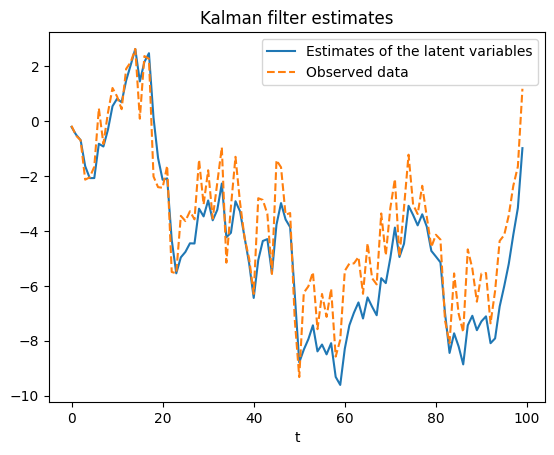

In [103]:
plt.plot(X_hat, label='Estimates of the latent variables')
plt.plot(Y, ls='--',label='Observed data')
plt.xlabel("t")
plt.title("Kalman filter estimates")
plt.legend()

## Prior as a proposal

Another common approach is to use the prior distribution as a proposal for SMC.

# Optimal proposal 

# VSMC

In [134]:
import torch
from torch import distributions

In [ ]:
N = 10  # Number of particles
T = 5  # Maximum time

for i in range(N):
    x[0,i] = r(params).sample()
    w[0,i] = f(x[0,i]) * g(y[0],x[0,i]) / r(x[0,i], params)
for t in range(1,T):
    for i in range(N):
        probs = [w[t-1,j]/(sum(w[t-1,:])) for j in range(N)]
        a[t-1,i] = distributions.Categorical(torch.tensor(probs)).sample()
        x[t,i] = r(x[t-1, a[t-1,i]],params).sample()
        x[:t, i] = [x[:t-1, a[t-1, i]], x[t,i]]
        w[t,i] = f(x[t,i], x[t-1,a[t-1,i]]) * g(y[t],x[t,i])

In [133]:
aa = torch.distributions.Categorical(torch.tensor([0.5,0.3,0.2])).sample((1000,))

sum(aa == 0)/1000,sum(aa == 1)/1000,sum(aa == 2)/1000


(tensor(0.4970), tensor(0.2950), tensor(0.2080))

# Normalizing Flow

---

# References

\[1\] T. Lacey, "Tutorial: The Kalman Filter". Accessed: Jul. 09, 2025. \[Online\]. Available: https://web.mit.edu/kirtley/kirtley/binlustuff/literature/control/Kalman%20filter.pdf.